# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
import pandas as pd
import numpy as np
import json
import random
from citipy import citipy
from Config.api_keys import weather_api_key
import requests
from pprint import pprint
import matplotlib.pyplot as plt



## Generate Cities List

In [ ]:
print(weather_api_key)

# cities = []
# for x in range(500):
#     ran_lat = random.randint(-90, 90)
#     ran_long = random.randint(-180,180)
#     city = citipy.nearest_city(ran_lat, ran_long)
#     cities.append(city.city_name)

# print(cities)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lng = []
temp = []
api_city = []
wind_speed = []
cloudiness = []
humidity = []
country = []
date = []


# Trouble shooting code
# city = 'london'
# response = requests.get(query_url + city).json()
# pprint(response)
# pprint(response['coord']['lat'])


good_count = 0
bad_count = 0
#Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        api_city.append(city)
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        good_count += 1
        print('---------------------------------------------------------------------------')
        print(f'{good_count} Success recieving data from {city}!\n')

    
    except KeyError:
        bad_count += 1
        print('--------------------------------------------------------------------------')
        print(f'{bad_count} Failed recieving data from {city} due to KeyError! \n')


---------------------------------------------------------------------------
1 Success recieving data from kapaa!

---------------------------------------------------------------------------
2 Success recieving data from chokurdakh!

---------------------------------------------------------------------------
3 Success recieving data from namatanai!

---------------------------------------------------------------------------
4 Success recieving data from butaritari!

---------------------------------------------------------------------------
5 Success recieving data from sao filipe!

---------------------------------------------------------------------------
6 Success recieving data from cabo san lucas!

---------------------------------------------------------------------------
7 Success recieving data from camacha!

---------------------------------------------------------------------------
8 Success recieving data from kaitangata!

-----------------------------------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
df = pd.DataFrame({
    'City': api_city,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': temp,
    'Humitidy': humidity,
    'Cloudiness': cloudiness,
    'Wind_Speed': wind_speed,
    'Country': country,
    'Date': date
})

df.head()

,City,Latitude,Longitude,Max Temp,Humitidy,Cloudiness,Wind_Speed,Country,Date
0,kapaa,22.0752,-159.3190,23.99,83,50,0.89,US,1622779396
1,chokurdakh,70.6333,147.9167,14.58,62,100,2.67,RU,1622779397
2,namatanai,-3.6667,152.4333,29.30,69,83,2.08,PG,1622779397
3,butaritari,3.0707,172.7902,28.03,76,90,3.32,KI,1622779397
4,sao filipe,14.8961,-24.4956,22.60,80,14,3.79,CV,1622779398


In [27]:
df.describe()

,Latitude,Longitude,Max Temp,Humitidy,Cloudiness,Wind_Speed,Date
count,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,4.630000e+02
mean,9.984601,5.401844,16.510281,73.494600,60.140389,3.653801,1.622779e+09
std,41.180250,104.236342,9.378698,18.566001,35.735012,2.436169,7.408346e+01
min,-54.800000,-175.200000,-5.120000,4.000000,0.000000,0.000000,1.622779e+09
25%,-24.791100,-73.414000,9.890000,68.500000,26.000000,1.840000,1.622779e+09
50%,6.363100,12.377800,18.510000,76.000000,73.000000,3.280000,1.622779e+09
75%,46.901700,108.381000,23.240000,86.500000,98.000000,5.360000,1.622779e+09
max,78.218600,178.416700,38.220000,100.000000,100.000000,14.540000,1.622779e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

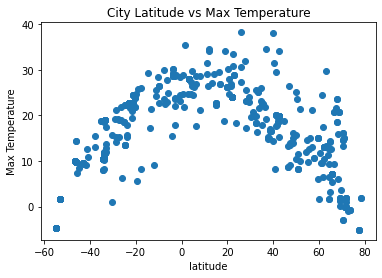

In [28]:
plt.scatter(lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

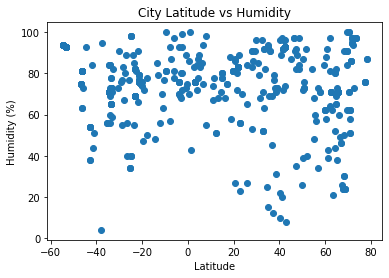

In [29]:
plt.scatter(lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

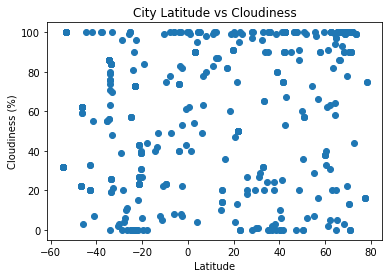

In [30]:
plt.scatter(lat, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

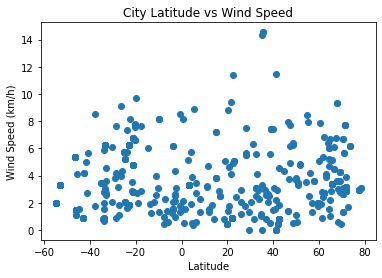

In [31]:
plt.scatter(lat, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.title('City Latitude vs Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


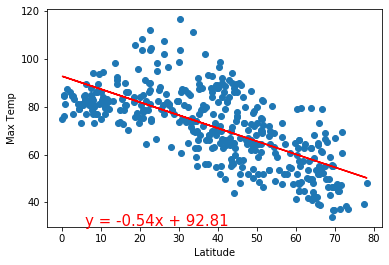

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


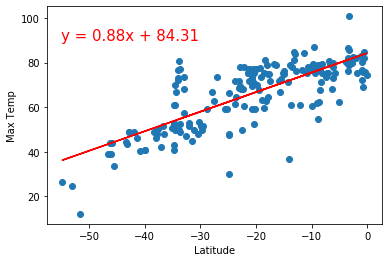

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


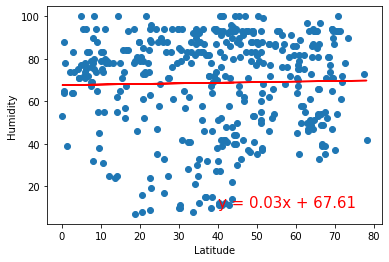

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


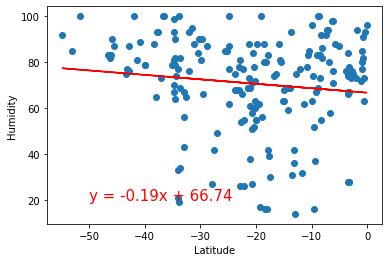

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


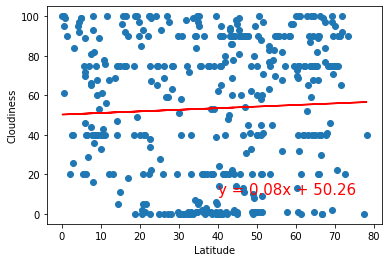

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


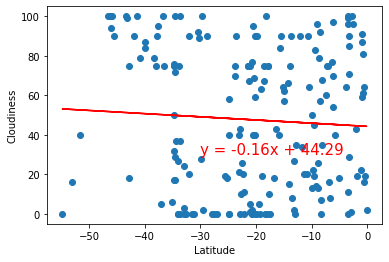

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


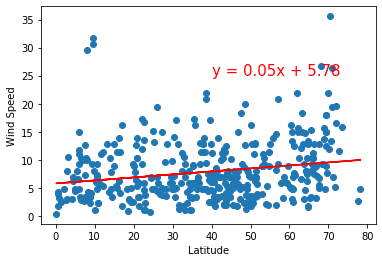

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


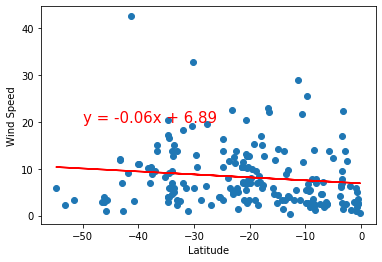